In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import scipy.stats as scs
import joblib
import matplotlib.pyplot as plt

In [2]:
# call data
data_analisa = joblib.load("D:/BOOTCAMP/project/(Block 4) ML Process/Data_project.csv")

In [3]:
data_analisa.head(2)

,Price,Bedroom,Bathroom,Land,Building,Garage,Important places,Location,Installment_BCA,Installment_BNI,Installment_Mandiri,Floor
0,2300000000,4,3,186,120,0,Tempat Penting,Kecamatan,10733333,2821333,6900000,Lantai_1
1,2900000000,13,13,84,254,1,Tempat Penting,Kecamatan,13533333,3557333,8700000,Lantai_1


In [4]:
data_analisa.describe().astype('int64')

,Price,Bedroom,Bathroom,Land,Building,Garage,Installment_BCA,Installment_BNI,Installment_Mandiri
count,1960,1960,1960,1960,1960,1960,1960,1960,1960
mean,5482887755,4,2,302,202,0,25586809,6725675,16448663
std,10193221557,3,3,2534,200,0,47568367,12503685,30579664
min,7000000,0,0,10,0,0,32666,8586,21000
25%,700000000,2,2,90,79,0,3266666,858666,2100000
50%,1500000000,3,2,135,150,0,7000000,1840000,4500000
75%,4500000000,5,3,265,250,1,21000000,5520000,13500000
max,97500000000,30,31,99506,2672,10,455000000,119600000,292500000


In [5]:
# Check duplicate
duplicateRows = data_analisa[data_analisa.duplicated()]
duplicateRows.head(5)

# it's not duplicated values

,Price,Bedroom,Bathroom,Land,Building,Garage,Important places,Location,Installment_BCA,Installment_BNI,Installment_Mandiri,Floor
49,1500000000,5,4,400,1000,4,Tempat Penting,Kecamatan,7000000,1840000,4500000,Lantai_1
55,3500000000,4,2,260,300,1,Tidak Penting,Kecamatan,16333333,4293333,10500000,Lantai_1
83,16500000000,6,2,75,130,0,Tempat Penting,Kecamatan,77000000,20240000,49500000,Lantai_1
90,750000000,11,3,65,120,0,Tidak Penting,Kecamatan,3500000,920000,2250000,Lantai_1
91,15500000000,4,4,163,255,0,Tempat Penting,Kecamatan,72333333,19013333,46500000,Lantai_1


# EDA

In [6]:
# check data skew (distribution)
data_analisa.skew(numeric_only = True)

Price                   3.664642
Bedroom                 3.238059
Bathroom                4.527725
Land                   34.508887
Building                4.036318
Garage                  2.720304
Installment_BCA         3.664642
Installment_BNI         3.664642
Installment_Mandiri     3.664642
dtype: float64

<AxesSubplot:xlabel='Installment_Mandiri', ylabel='Density'>

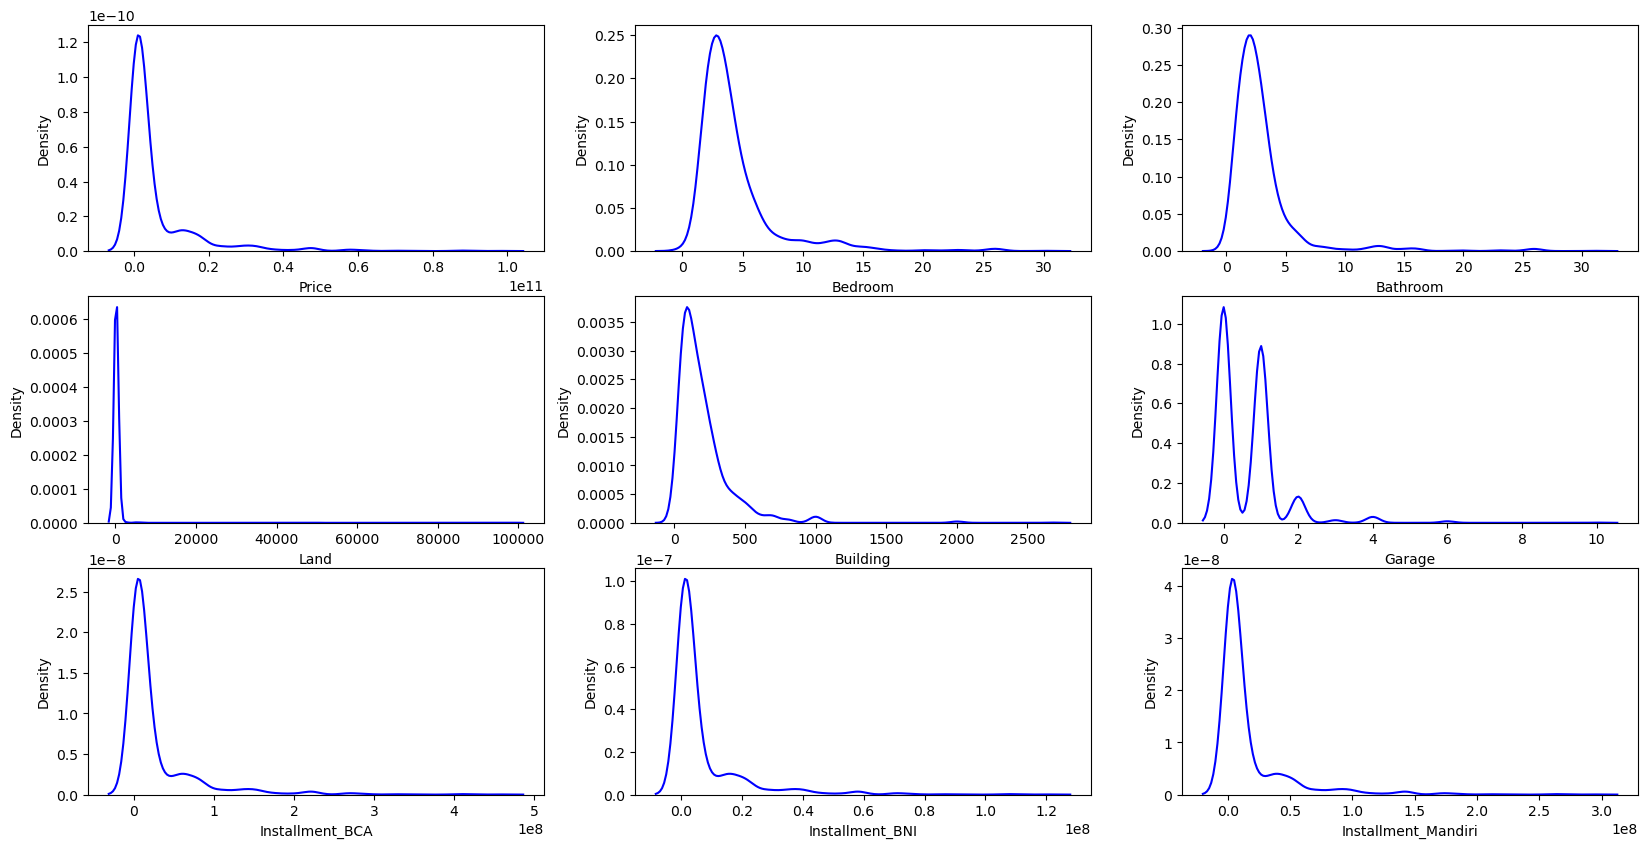

In [7]:
# check with visualization
fig, axs = plt.subplots(3, 3, figsize=(20, 10))

sns.kdeplot(data=data_analisa, x="Price",color="blue", ax=axs[0, 0])
sns.kdeplot(data=data_analisa, x="Bedroom",color="blue", ax=axs[0, 1])
sns.kdeplot(data=data_analisa, x="Bathroom",color="blue", ax=axs[0, 2])
sns.kdeplot(data=data_analisa, x="Land",color="blue", ax=axs[1, 0])
sns.kdeplot(data=data_analisa, x="Building",color="blue", ax=axs[1, 1])
sns.kdeplot(data=data_analisa, x="Garage",color="blue", ax=axs[1, 2])
sns.kdeplot(data=data_analisa, x="Installment_BCA",color="blue", ax=axs[2, 0])
sns.kdeplot(data=data_analisa, x="Installment_BNI",color="blue", ax=axs[2, 1])
sns.kdeplot(data=data_analisa, x="Installment_Mandiri",color="blue", ax=axs[2, 2])

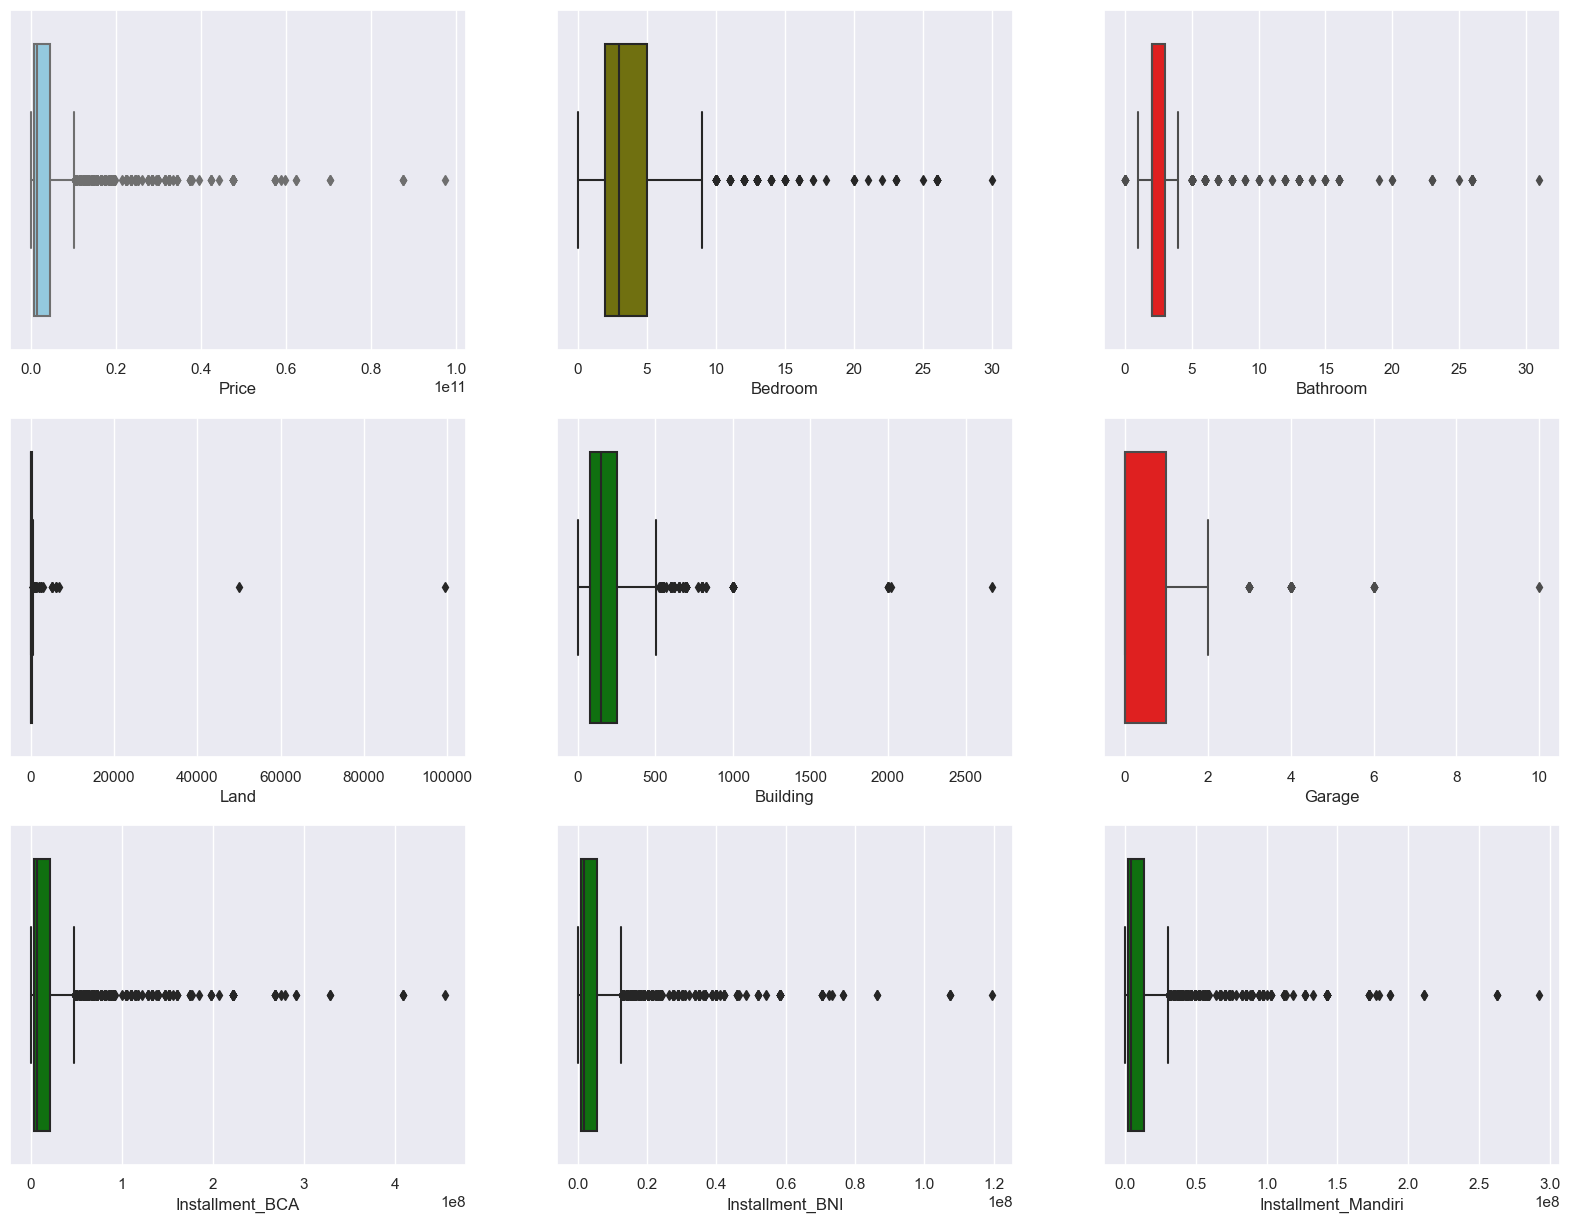

In [8]:
# Check boxplot for outlier data numeric

sns.set(style="darkgrid")

fig, axs = plt.subplots(3, 3, figsize=(20, 15))

sns.boxplot(data=data_analisa, x="Price", color="skyblue", ax=axs[0, 0])
sns.boxplot(data=data_analisa, x="Bedroom", color="olive", ax=axs[0, 1])
sns.boxplot(data=data_analisa, x="Bathroom", color="red", ax=axs[0, 2])
sns.boxplot(data=data_analisa, x="Land", color="green", ax=axs[1, 0])
sns.boxplot(data=data_analisa, x="Building", color="green", ax=axs[1, 1])
sns.boxplot(data=data_analisa, x="Garage", color="red", ax=axs[1, 2])
sns.boxplot(data=data_analisa, x="Installment_BCA", color="green", ax=axs[2, 0])
sns.boxplot(data=data_analisa, x="Installment_BNI", color="green", ax=axs[2, 1])
sns.boxplot(data=data_analisa, x="Installment_Mandiri", color="green", ax=axs[2, 2])

plt.show()

<AxesSubplot:xlabel='Floor', ylabel='Count'>

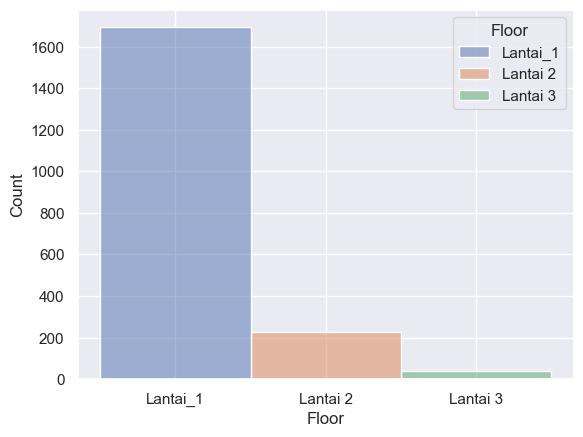

In [9]:
# group data Floor
sns.histplot(data = data_analisa, x = "Floor", hue = "Floor")

In [10]:
# see pattern data with analysis
floor_1 = data_analisa[(data_analisa['Floor'] == 'Lantai 1')]
floor_2 = data_analisa[(data_analisa['Floor'] == 'Lantai 2')]
floor_3 = data_analisa[(data_analisa['Floor'] == 'Lantai 3')]

median_1 = floor_1.groupby(["Floor"])["Price"].median().astype('int64')
median_2 = floor_2.groupby(["Floor"])["Price"].median().astype('int64')
median_3 = floor_3.groupby(["Floor"])["Price"].median().astype('int64')

median = {
          'Floor' : ['1','2','3'],
          'median' : ['1500000000','2150000000','1800000000']
         }

pd.DataFrame.from_dict(median)

,Floor,median
0,1,1500000000
1,2,2150000000
2,3,1800000000


In [11]:
# make binning data for buildings and lands

data_analisa['bin_land'] = pd.cut(
                            data_analisa['Land'],
                            [0,100,200,300,1000,99506], 
                            right=False, 
                            labels=list('ABCDE'))


data_analisa['bin_build'] = pd.cut(
                            data_analisa['Building'],
                            [0,100,200,300,1000,2020], 
                            right=False, 
                            labels=list('ABCDE'))                       

In [12]:
# change bin name

data_analisa['bin_build'] = data_analisa['bin_build'].apply(lambda x : x.replace('A','Very Small'))
data_analisa['bin_build'] = data_analisa['bin_build'].apply(lambda x : x.replace('B','Small'))
data_analisa['bin_build'] = data_analisa['bin_build'].apply(lambda x : x.replace('C','Medium'))
data_analisa['bin_build'] = data_analisa['bin_build'].apply(lambda x : x.replace('D','Large'))
data_analisa['bin_build'] = data_analisa['bin_build'].apply(lambda x : x.replace('E','Very Large'))

data_analisa['bin_land'] = data_analisa['bin_land'].apply(lambda x : x.replace('A','Very Small'))
data_analisa['bin_land'] = data_analisa['bin_land'].apply(lambda x : x.replace('B','Small'))
data_analisa['bin_land'] = data_analisa['bin_land'].apply(lambda x : x.replace('C','Medium'))
data_analisa['bin_land'] = data_analisa['bin_land'].apply(lambda x : x.replace('D','Large'))
data_analisa['bin_land'] = data_analisa['bin_land'].apply(lambda x : x.replace('E','Very Large'))

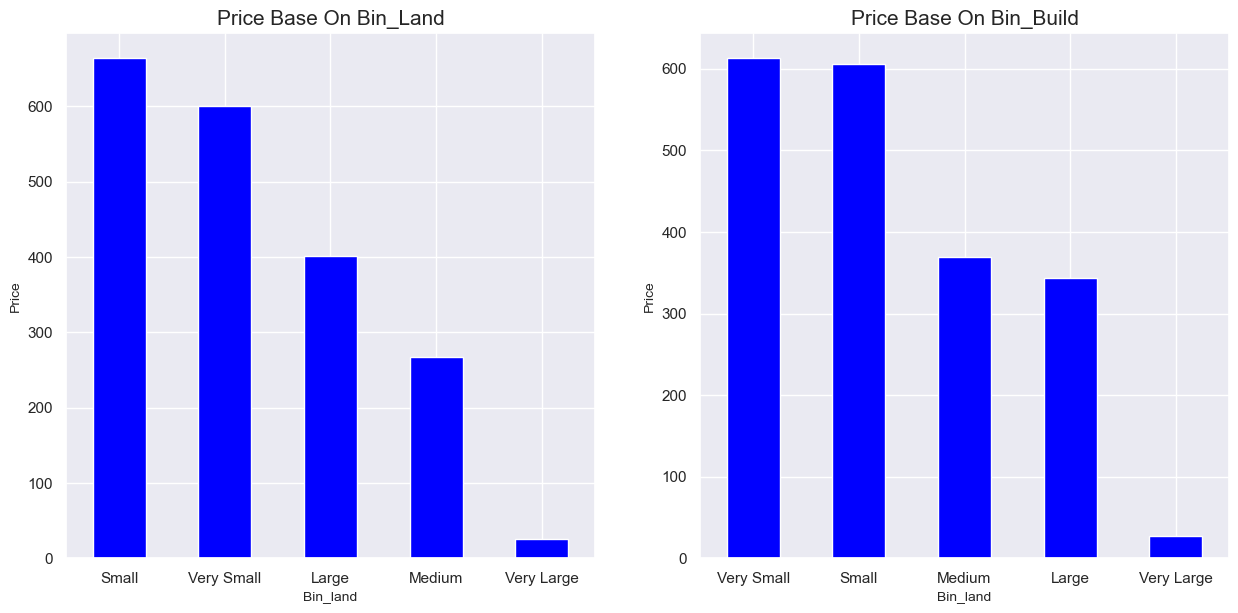

In [13]:
# see visualization data bin land
bin_land = data_analisa.groupby(["bin_land"])["Price"].count().sort_values(ascending=False)
bin_build = data_analisa.groupby(["bin_build"])["Price"].count().sort_values(ascending=False)

# visualization bin_land
plt.subplot(2, 2, 1)
bin_land.plot(x="Price", y="bin_land", kind="bar", figsize=(15, 15), rot= 0, color='blue')
plt.title ("Price Base On Bin_Land", size = 15)
plt.ylabel('Price', size = 10)
plt.xlabel('Bin_land',  size = 10)
plt.minorticks_on()

# visualization bin_build
plt.subplot(2, 2, 2)
bin_build.plot(x="Price", y="bin_build", kind="bar", figsize=(15, 15), rot= 0, color='blue')
plt.title ("Price Base On Bin_Build", size = 15)
plt.ylabel('Price', size = 10)
plt.xlabel('Bin_land',  size = 10)
plt.minorticks_on()

In [14]:
# check median base on bin_lands

land_verysmall = data_analisa[(data_analisa['bin_land'] == 'Very Small')]
land_small = data_analisa[(data_analisa['bin_land'] == 'Small')]
land_medium = data_analisa[(data_analisa['bin_land'] == 'Medium')]
land_large = data_analisa[(data_analisa['bin_land'] == 'Large')]
land_verylarge = data_analisa[(data_analisa['bin_land'] == 'Very Large')]

median_land1 = land_verysmall.groupby(["bin_land"])["Price"].median()
median_land2 = land_small.groupby(["bin_land"])["Price"].median()
median_land3 = land_medium.groupby(["bin_land"])["Price"].median()
median_land4 = land_large.groupby(["bin_land"])["Price"].median()
median_land5 = land_verylarge.groupby(["bin_land"])["Price"].median()

# check median base on bin_build

build_verysmall = data_analisa[(data_analisa['bin_build'] == 'Very Small')]
build_small = data_analisa[(data_analisa['bin_build'] == 'Small')]
build_medium = data_analisa[(data_analisa['bin_build'] == 'Medium')]
build_large = data_analisa[(data_analisa['bin_build'] == 'Large')]
build_verylarge = data_analisa[(data_analisa['bin_build'] == 'Very Large')]

median_11 = build_verysmall.groupby(["bin_build"])["Price"].median()
median_22 = build_small.groupby(["bin_build"])["Price"].median()
median_33 = build_medium.groupby(["bin_build"])["Price"].median()
median_44 = build_large.groupby(["bin_build"])["Price"].median()
median_55 = build_verylarge.groupby(["bin_build"])["Price"].median()

In [15]:
# Check median lands
median_land = {
          'land' : ['very_small','small','medium','large','very_large'],
          'median' : ['690000000','1600000000','2500000000','4000000000','4500000000']
         }

pd.DataFrame.from_dict(median_land)

,land,median
0,very_small,690000000
1,small,1600000000
2,medium,2500000000
3,large,4000000000
4,very_large,4500000000


In [16]:
# Check median builds
median_build = {
          'land' : ['very_small','small','medium','large','very_large'],
          'median' : ['685000000','1700000000','2800000000','3900000000','10000000000']
         }

pd.DataFrame.from_dict(median_build)

,land,median
0,very_small,685000000
1,small,1700000000
2,medium,2800000000
3,large,3900000000
4,very_large,10000000000


In [17]:
# drop columns bin because not use again
data_analisa = data_analisa.drop(columns=['bin_land','bin_build'])

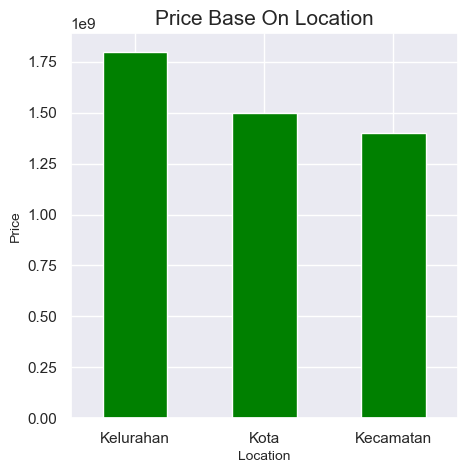

In [18]:
# we want check with Important places column with bin
price_location = data_analisa.groupby(["Location"])["Price"].median().astype('int64').sort_values(ascending=False).head(10)

# see with visualization
price_location.plot(x="Price", y="Location", kind="bar", figsize=(5, 5), rot= 0, color='green')
plt.title ("Price Base On Location", size = 15)
plt.ylabel('Price', size = 10)
plt.xlabel('Location',  size = 10)
plt.minorticks_on()

<AxesSubplot:xlabel='Important places', ylabel='Count'>

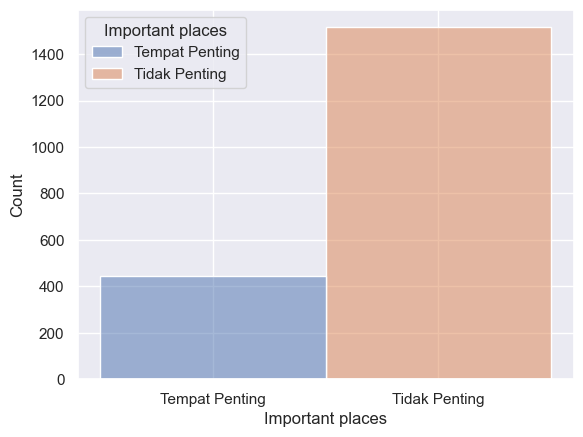

In [19]:
# group data important places
sns.histplot(data = data_analisa, x = "Important places", hue = "Important places")

In [20]:
# Check important places with price
tempat_penting = data_analisa[(data_analisa['Important places'] == 'Tempat Penting')]
Tidak_penting = data_analisa[(data_analisa['Important places'] == 'Tidak Penting')]

# grouping with price
median_place = tempat_penting.groupby(["Important places"])["Price"].median().astype('int64')
median_unknown = Tidak_penting.groupby(["Important places"])["Price"].median().astype('int64')

In [21]:
# Chekc median importent places
median_place = {
          'Places' : ['Tempat Penting','Tidak Penting'],
          'median' : ['1900000000','1400000000']
         }

pd.DataFrame.from_dict(median_place)

,Places,median
0,Tempat Penting,1900000000
1,Tidak Penting,1400000000


# Correlation

Correlation Category VS Category make chisquare

Now we want make method Bonferroni-adjusted p-value for checking correlation with data dummy

In [22]:
# we make chi-square

import researchpy as rp

results_1 = rp.crosstab(data_analisa['Floor'], 
                                 data_analisa['Location'], 
                                 prop= 'col', test= 'chi-square')

results_2 = rp.crosstab(data_analisa['Floor'], 
                                 data_analisa['Location'], 
                                 prop= 'col', test= 'chi-square')


results_3 = rp.crosstab(data_analisa['Important places'], 
                                 data_analisa['Location'], 
                                 prop= 'col', test= 'chi-square')

In [23]:
# look p-value
results_1, results_2, results_3

((          Location                          
  Location Kecamatan Kelurahan    Kota     All
  Floor                                       
  Lantai 2     10.41     14.63   14.34   11.63
  Lantai 3      1.60      1.79    3.98    1.94
  Lantai_1     87.99     83.58   81.67   86.43
  All         100.00    100.00  100.00  100.00,
                  Chi-square test  results
  0  Pearson Chi-square ( 4.0) =   13.5594
  1                    p-value =    0.0088
  2                 Cramer's V =    0.0588),
 (          Location                          
  Location Kecamatan Kelurahan    Kota     All
  Floor                                       
  Lantai 2     10.41     14.63   14.34   11.63
  Lantai 3      1.60      1.79    3.98    1.94
  Lantai_1     87.99     83.58   81.67   86.43
  All         100.00    100.00  100.00  100.00,
                  Chi-square test  results
  0  Pearson Chi-square ( 4.0) =   13.5594
  1                    p-value =    0.0088
  2                 Cramer's V =    0

Check correlation numeric vs category with spearman

In [24]:
from scipy.stats import spearmanr # method for correlation numeric VS categoric

def correlation_spearman (x_column, y_column):
        # input data and Choose column integer
        x = data_analisa[x_column] # input data (change column data input for check)
        y = data_analisa[y_column] # data ouput

        # print data
        corr, _ = spearmanr(x, y)
        print('Spearmans correlation: %.3f' % corr)

In [25]:
# important places
correlation_spearman('Price', 'Important places')
correlation_spearman('Bedroom', 'Important places')
correlation_spearman('Bathroom', 'Important places')
correlation_spearman('Land', 'Important places')
correlation_spearman('Building', 'Important places')
correlation_spearman('Garage', 'Important places')
correlation_spearman('Installment_BCA', 'Important places')
correlation_spearman('Installment_BNI', 'Important places')
correlation_spearman('Installment_Mandiri', 'Important places')

Spearmans correlation: -0.057
Spearmans correlation: -0.129
Spearmans correlation: -0.123
Spearmans correlation: -0.020
Spearmans correlation: -0.080
Spearmans correlation: 0.030
Spearmans correlation: -0.057
Spearmans correlation: -0.057
Spearmans correlation: -0.057


C:\Users\HP Notebook\anaconda3\lib\site-packages\scipy\stats\_stats_py.py:110: RuntimeWarning: The input array could not be properly checked for nan values. nan values will be ignored.
  warnings.warn("The input array could not be properly "


In [26]:
# Correlation Location
correlation_spearman('Price', 'Location')
correlation_spearman('Bedroom', 'Location')
correlation_spearman('Bathroom', 'Location')
correlation_spearman('Land', 'Location')
correlation_spearman('Building', 'Location')
correlation_spearman('Garage', 'Location')
correlation_spearman('Installment_BCA', 'Location')
correlation_spearman('Installment_BNI', 'Location')
correlation_spearman('Installment_Mandiri', 'Location')

Spearmans correlation: 0.068
Spearmans correlation: 0.081
Spearmans correlation: 0.108
Spearmans correlation: 0.066
Spearmans correlation: 0.103
Spearmans correlation: -0.037
Spearmans correlation: 0.068
Spearmans correlation: 0.068
Spearmans correlation: 0.068


In [27]:
# Correlation Floor
correlation_spearman('Price', 'Floor')
correlation_spearman('Bedroom', 'Floor')
correlation_spearman('Bathroom', 'Floor')
correlation_spearman('Land', 'Floor')
correlation_spearman('Building', 'Floor')
correlation_spearman('Garage', 'Floor')
correlation_spearman('Installment_BCA', 'Floor')
correlation_spearman('Installment_BNI', 'Floor')
correlation_spearman('Installment_Mandiri', 'Floor')

Spearmans correlation: -0.093
Spearmans correlation: -0.122
Spearmans correlation: -0.145
Spearmans correlation: 0.008
Spearmans correlation: -0.119
Spearmans correlation: 0.064
Spearmans correlation: -0.093
Spearmans correlation: -0.093
Spearmans correlation: -0.093


We want check correlation with ANOVA (multiple category vs numerik) we use columns Floor and Location because there are have > two variable

In [28]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

#perform two-way ANOVA
def Anova (column):
            model = ols("""column ~ C(Floor) + C(Location) + 
                        C(Floor):C(Location)""", data=data_analisa).fit()

            output = sm.stats.anova_lm(model, typ=2)
            print(output)
            print('<<<<<<<>>>>>>')

In [29]:
# check Anova correlation
Anova(data_analisa['Price'])
Anova(data_analisa['Bedroom'])
Anova(data_analisa['Bathroom'])
Anova(data_analisa['Land'])
Anova(data_analisa['Building'])
Anova(data_analisa['Garage'])
Anova(data_analisa['Installment_BCA'])
Anova(data_analisa['Installment_BNI'])
Anova(data_analisa['Installment_Mandiri'])

                            sum_sq      df         F    PR(>F)
C(Floor)              2.024762e+21     2.0  9.845104  0.000056
C(Location)           2.036967e+20     2.0  0.990445  0.371598
C(Floor):C(Location)  6.457156e+20     4.0  1.569848  0.179700
Residual              2.006231e+23  1951.0       NaN       NaN
<<<<<<<>>>>>>
                            sum_sq      df          F        PR(>F)
C(Floor)                320.724304     2.0  14.537439  5.408190e-07
C(Location)              53.502894     2.0   2.425120  8.873410e-02
C(Floor):C(Location)    167.701205     4.0   3.800688  4.396936e-03
Residual              21521.435181  1951.0        NaN           NaN
<<<<<<<>>>>>>
                            sum_sq      df          F        PR(>F)
C(Floor)                346.673508     2.0  19.515115  4.058397e-09
C(Location)              80.391865     2.0   4.525458  1.094367e-02
C(Floor):C(Location)    171.375961     4.0   4.823590  7.148723e-04
Residual              17329.131908  1951.0   

Check Linear Regression

In [30]:
import pandas as pd
import statsmodels.api as sm

# Specify the dependent variable and the independent variables
dependent_variable = 'Price'
independent_variables = ['Bedroom', 'Bathroom', 'Building', 'Garage', 'Land']

# Add a constant column to the independent variables
data_analisa['intercept'] = 1

# Fit the five-way linear regression model
model = sm.OLS(data_analisa[dependent_variable], data_analisa[independent_variables + ['intercept']]).fit()

# Print the model summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Price   R-squared:                       0.050
Model:                            OLS   Adj. R-squared:                  0.047
Method:                 Least Squares   F-statistic:                     20.39
Date:                Thu, 30 Mar 2023   Prob (F-statistic):           6.83e-20
Time:                        14:58:03   Log-Likelihood:                -47899.
No. Observations:                1960   AIC:                         9.581e+04
Df Residuals:                    1954   BIC:                         9.584e+04
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Bedroom     1.086e+08   1.25e+08      0.870      0.3

####  summary : 
#### price = 3.016e+09 +  1.086e+08  (Bedroom) +  5.084e+07 (Bathroom)  + 1.009e+07 (Building (m²)) - 2.811e+08 (Garage) - 3.211e+04 Land (m²)

In [31]:
# delete column not use again
data_analisa = data_analisa.drop(columns=['intercept'])

### Hipotesis Uji (t-test)

First we want split data base on visualization before, How big is the difference unqiue columns.. We make class 0 and class 1 !

In [32]:
# split class by category column Important places (2 variable) 
dataset_places = data_analisa[data_analisa['Important places'] == "Tempat Penting"].copy() 
dataset_not_places = data_analisa[data_analisa['Important places'] != "Tidak Penting"].copy() 

In [33]:
# split class by category column Floor (2 variable)
dataset_floor1 = data_analisa[data_analisa['Floor'] == "Lantai 1"].copy()
dataset_not_floor = data_analisa[data_analisa['Floor'] != "Lantai 1"].copy()

Uji Hipotesa !

h0    = mean price untuk kelas 0 = mean price untuk kelas 1

h1    = mean price untuk kelas 0 != mean price untuk kelas 1

NOTE : with value t-value < t-critical and value p-value < 0.05 then reject h0 

In [34]:
# t critical values for alpha 0.05
scs.t.ppf(0.05, df = (len(data_analisa) - 2))

-1.6456322248766684

In [35]:
# perform t-test 2 variable Important places column
scs.ttest_ind(
    dataset_places[dataset_places.Price.isnull() != True].Price,
    dataset_not_places[dataset_not_places.Price.isnull() != True].Price
)

Ttest_indResult(statistic=0.0, pvalue=1.0)

Result: t-value < t-critical and p-value > 0.05 

mean between class 0 and class 1 for price statistically significant

In [36]:
# perform t-test 2 variable Floor column
scs.ttest_ind(
    dataset_floor1[dataset_floor1.Price.isnull() != True].Price,
    dataset_not_floor[dataset_not_floor.Price.isnull() != True].Price
)

Ttest_indResult(statistic=nan, pvalue=nan)

Result: t-value < t-critical and p-value < 0.05 

mean between class 0 and class 1 for price then reject h0

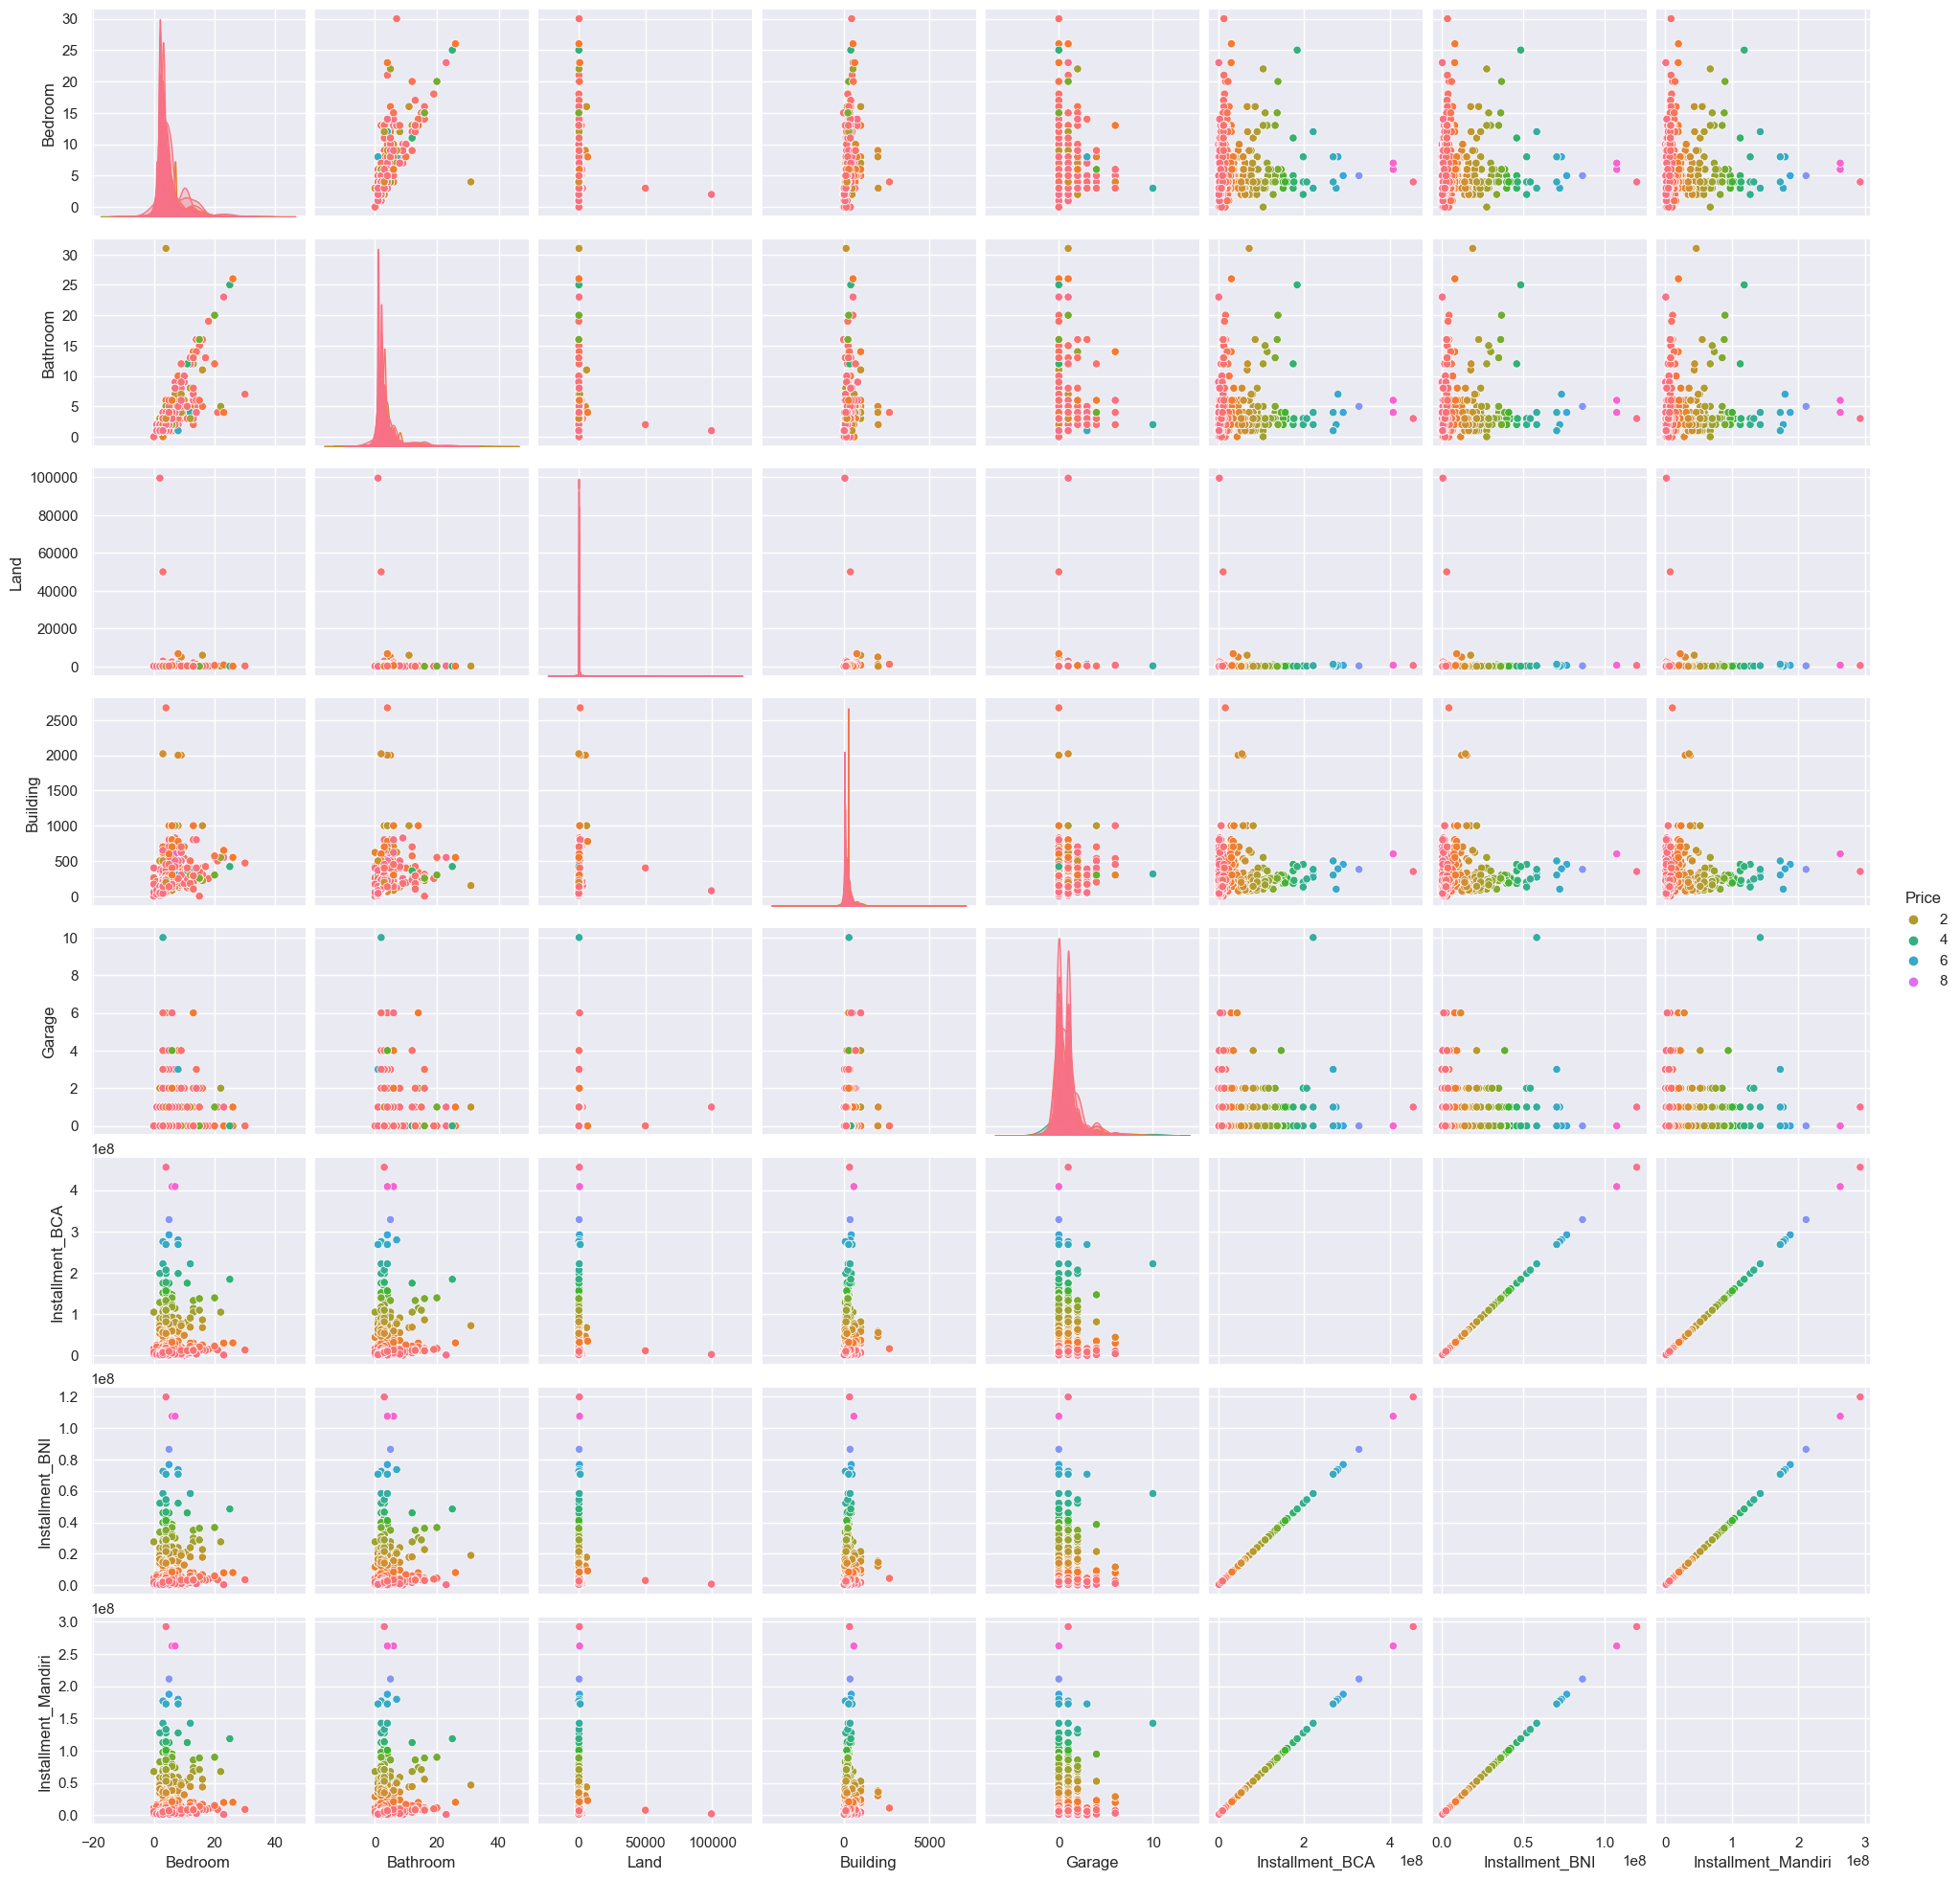

In [37]:
# correlation linear
sns.pairplot(data_analisa, hue ='Price',palette="husl")

# to show
plt.show()

<AxesSubplot:>

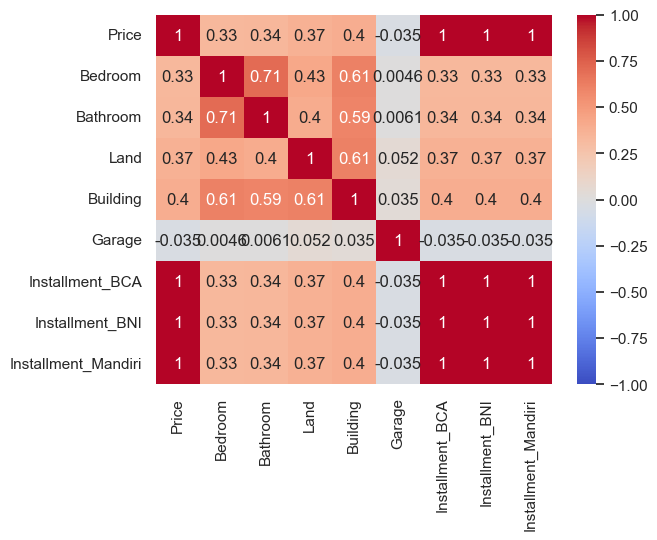

In [38]:
# check correlation between the two numeric with kernell method because we look visualization pairplot have not all linier
corr = data_analisa.corr(method='kendall')

# Membuat heatmap korelasi kernel dengan library Seaborn
sns.heatmap(corr, cmap='coolwarm', annot=True, vmin=-1, vmax=1)

### Sumarry

EDA : 

1. The highest floor column is floor 1
2. Median from column variabel is : 
    FLoor_1 : 1500000000
    Floor_2 : 2100000000
    Floor_3 : 1400000000
3. The highest data from bin_land and bin_build is : Small
4. Median From bin_land and bin build column is :
    Very Small : 690000000 / 685000000
    Small : 1600000000 / 1700000000
    Medium : 2500000000 / 2800000000
    Large : 4000000000 / 3900000000
    Very Large : 4500000000 / 10000000000
median bin_build greater than bin_land
5. The highest Location columns is Kelurahan
6. The highest Important Places is Tidak Penting and imbalance data ( median Tempat Penting : 1900000000, Tidak Penting : 1400000000

Correlation :
1. Correlation Bivariant from between column category vs category have < p-value, mean is columns between columns category have correlation
2. Correlation Bivariant from between column numeric vs category is low correlation in range (0..)
3. Correlation Anova 2 category (n) vs 1 numeric columns (floor & Important places) that have < p-value is Bedroom (0.002) and Bathroom (0.0008)
4. Correlation Multivariant from all numeric columns the highest is Bedroom vs Bathroom as big as 0.71, Building VS Bedroom as big as 0.61, Building vs Bathroom as big as 0.59, and all other columns have > 0.2 correlation.
5. Relationship Linier regression we obtain is :  
price = 3.016e+09 + 1.086e+08 (Bedroom) + 5.084e+07 (Bathroom) + 1.009e+07 (Building (m²)) - 2.811e+08 (Garage) - 3.211e+04 Land (m²)

Uji Hipotesis :

t-test :
1. Important places - mean between class 0 and class 1 for price statistically significant
2. Floor - mean between class 0 and class 1 for price then reject h0

Correlation Numeric vs Numeric (multivariant):
range correlation is between (0.3 - 0.7) low - strong correlation (+)